<a href="https://colab.research.google.com/github/Tony14100/Date-cocktail/blob/main/%D0%BA%D0%B5%D1%80%D0%B0%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


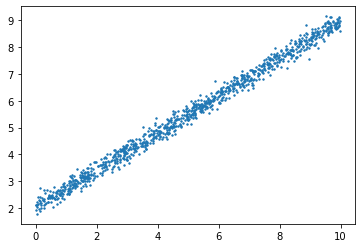

In [ ]:
TOTAL_POINTS = 1000
 
x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)
 
k_true = 0.7
b_true = 2.0
 
y = x * k_true + b_true + noise
 
plt.scatter(x, y, s=2)
plt.show()

In [ ]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

In [ ]:
EPOCHS = 500
learning_rate = 0.02

In [ ]:
for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k * x + b
        loss = tf.reduce_mean(tf.square(y - f))
 
    dk, db = t.gradient(loss, [k, b])
 
    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6973571>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0172024>


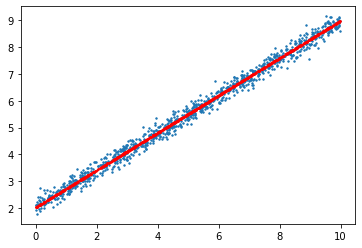

In [ ]:
print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.8.2


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions


array([[-0.22576186,  0.27969122, -0.03498954,  0.63805217, -0.17440207,
         0.29119903, -0.5057482 ,  1.085677  ,  0.6028427 , -0.5658263 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.06083138, 0.10084239, 0.07361714, 0.14430363, 0.06403729,
        0.10200956, 0.04597599, 0.22577627, 0.1393112 , 0.04329518]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.2826886

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2986 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1452 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1090 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0907 - accuracy: 0.9723
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0770 - accuracy: 0.9758


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0761 - accuracy: 0.9774 - 710ms/epoch - 2ms/step


[0.07614625245332718, 0.977400004863739]